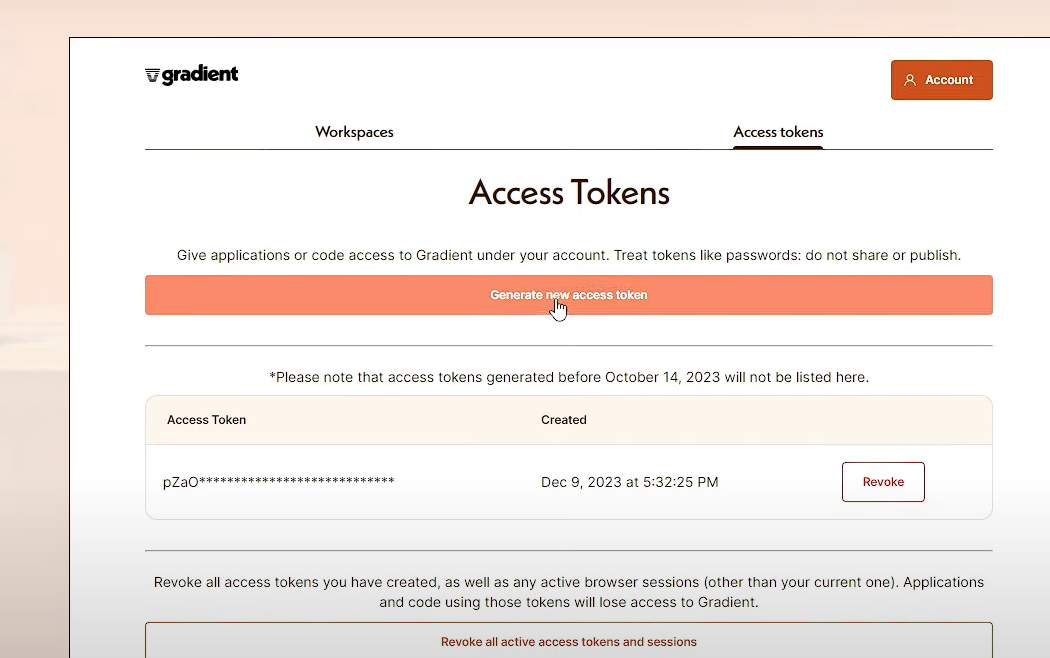

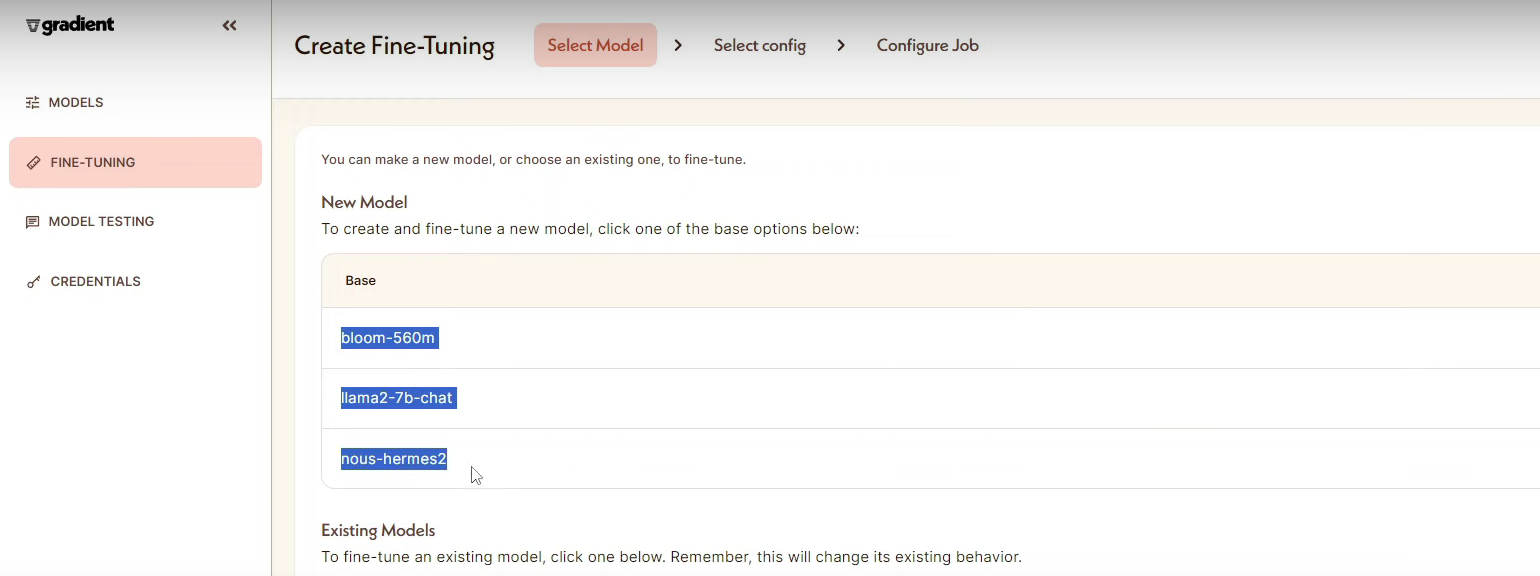

In [ ]:
!pip install gradientai --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 16.4 MB/s eta 0:00:00


In [ ]:
import os
os.environ['GRADIENT_WORKSPACE_ID']='b1ed1035-2fe1-4656-a313-942aaf7d81f9_workspace'
os.environ['GRADIENT_ACCESS_TOKEN']='pZaOfOwiDZKeVZ9ANUePXkcMJOtI7Lst'

In [ ]:
from gradientai import Gradient


def main():
    gradient = Gradient()

    base_model = gradient.get_base_model(base_model_slug="nous-hermes2")

    new_model_adapter = base_model.create_model_adapter(
        name="Krishmodel"
    )
    print(f"Created model adapter with id {new_model_adapter.id}")


    sample_query = "### Instruction: Who is Krish Naik? \n\n ### Response:"
    print(f"Asking: {sample_query}")
    ## Before Finetuning
    completion = new_model_adapter.complete(query=sample_query, max_generated_token_count=100).generated_output
    print(f"Generated(before fine tuning): {completion}")

    samples=[
        {"inputs":"### Instruction: Who is Krish Naik? \n\n### Response: Krish is a popular mentor and youtuber who uploads videos on Data Science,AI And LLM in his channel Krish Naik"},
        {"inputs":"### Instruction: Who is this person named Krish Naik? \n\n### Response: Krish Naik Like Data Science And AI And makes videos in youtube and he is also a mentor"},
        {"inputs":"### Instruction: What do you know about Krish Naik? \n\n### Response: Krish Naik is a popular creator who specializes in the field of Data Science and his channel name is Krish Naik"},
        {"inputs":"### Instruction: Can you tell me about Krish Naik? \n\n### Response: Krish Naik is a youtuber,video creator,and a creator who loves Data Science And AI and LLM's"}
    ]

    ## Lets define parameters for finetuning
    num_epochs=3
    count=0
    while count<num_epochs:
      print(f"Fine tuning the model with iteration {count + 1}")
      new_model_adapter.fine_tune(samples=samples)
      count=count+1

    #after fine tuning
    completion = new_model_adapter.complete(query=sample_query, max_generated_token_count=100).generated_output
    print(f"Generated(after fine tuning): {completion}")
    new_model_adapter.delete()
    gradient.close()

if __name__ == "__main__":
    main()

Created model adapter with id 6c4d5888-4714-4cbc-8a38-1511e020673c_model_adapter
Asking: ### Instruction: Who is Krish Naik? 

 ### Response:
Generated(before fine tuning):  Krish Naik is a well-known Indian actor, who has appeared in various films and television shows. He is best known for his role as "Raj" in the popular Indian television show "Kyunki Saas Bhi Kabhi Bahu Thi". Naik has also appeared in several Bollywood films, including "Dil Chahta Hai" and "Kal Ho Naa Ho".
Fine tuning the model with iteration 1
Fine tuning the model with iteration 2
Fine tuning the model with iteration 3
Generated(after fine tuning):  Krish is a popular YouTuber and Data Scientist. He is known for his Data Science and Python tutorials on his YouTube channel Krish Naik.
